In [1]:
# Load essential libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import numpy as np
from scipy.signal import butter, lfilter, freqz
from IPython.display import Image

from datetime import datetime

In [2]:
# Time and robot egomotion
time = []
standardized_time = []
standardized_time2 = []
compass_heading = []
speed = []
speed_y = []

# sonde data
temp = []
PH = []
cond = [] # ms
chlorophyll = [] 
ODO = [] # mg/L
sonar = []
angular_z = []

# wp data
wp_time = []
wp_seq = []

In [3]:
initial_time = None
time_crop = 4000
time_crop1 = 2285
time_crop2 = 2300

# File loading from relative path
#file = '../../../Data/ISER2021/China-catabot-20201006.csv'
file = '../../../Data/ISER2021/China-catabot-20201006-gndspeed.csv'
# File loading from relative path
file2 = '../../../Data/ISER2021/China-catabot-20201006-mavros.csv'

# original data
with open(file, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # robot data
        if initial_time is None:
            initial_time = float(row[0])
        
        current_time = float(row[0])
        
        #if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
        if current_time - initial_time <= time_crop:
            time.append(float(row[0]))
            compass_heading.append(float(row[4]))
            speed.append(float(row[6]))
            speed_y.append(float(row[11]))
            angular_z.append(float(row[18]))

            # sonde data
            temp.append(float(row[23]))
            PH.append(float(row[26]))
            cond.append(float(row[25]))
            chlorophyll.append(float(row[29]))
            ODO.append(float(row[30]))
            sonar.append(float(row[8]))


    minimum_time = min(time)
    for time_stamp in time:
        standardized_time.append(time_stamp - minimum_time)

# wp data 
with open(file2, 'r') as csvfile2:
    csvreader2 = csv.reader(csvfile2, delimiter=',')
    header = next(csvreader2)
    for row in csvreader2:
        current_time = float(row[0])
        
        if current_time - initial_time <= time_crop:
        #if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
            wp_time.append(float(row[0]))
            wp_seq.append(float(row[1]))
            
    for time_stamp in wp_time:
        standardized_time2.append(time_stamp - minimum_time)

In [4]:
standardized_time2

[568.3993563652039,
 573.4196488857269,
 751.5762028694153,
 756.5946922302246,
 813.6927320957184,
 818.7112998962402,
 1092.2240586280823,
 1097.242814540863,
 1139.8434052467346,
 1144.8628597259521,
 1481.4532732963562,
 1486.472694158554,
 1538.6305129528046,
 1543.6516244411469,
 1909.4609701633453,
 1914.4799513816833,
 1954.6403217315674,
 1959.658656835556,
 2288.109833240509,
 2293.1281819343567,
 2342.827885389328,
 2347.8482568264008,
 2689.8184719085693,
 2694.837943315506,
 2731.1767921447754,
 2736.1956074237823,
 3051.548160791397,
 3056.5659227371216,
 3172.8644704818726,
 3177.8834385871887,
 3414.856861114502]

### Compass heading

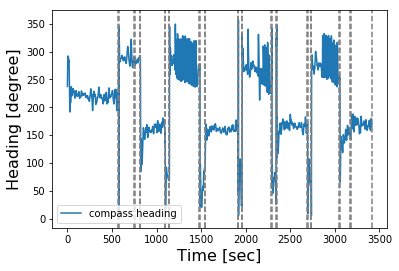

In [5]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Heading [degree]', fontsize=16)
ax1.plot(standardized_time, compass_heading, label='compass heading')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

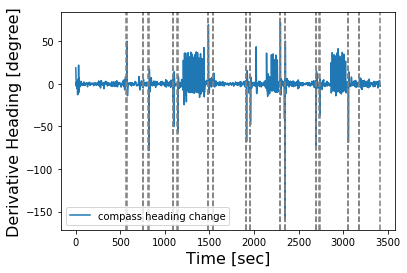

In [6]:
# Figure initialization
fig, ax1 = plt.subplots()

dt_list = []
dy_list = []

for i, data in enumerate(compass_heading):
    if i == 0:
        continue
    else:
        dt_list.append(standardized_time[i] - standardized_time[i-1])
        compass_difference = compass_heading[i] - compass_heading[i-1]
        if 270 <= compass_heading[i-1] < 360 and 0<= compass_heading[i] <=90:
            compass_difference += 360
        elif 270 <= compass_heading[i] < 360 and 0<= compass_heading[i-1] <=90:
            compass_difference -= 360
        dy_list.append(compass_difference)
        
dt_list = np.array(dt_list)
dy_list = np.array(dy_list)

        
ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Derivative Heading [degree]', fontsize=16)
ax1.plot(standardized_time[1:], dy_list/dt_list, label='compass heading change')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

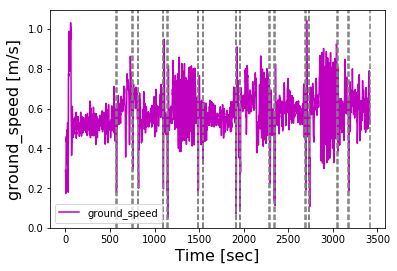

In [7]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ground_speed [m/s]', fontsize=16)
ax1.plot(standardized_time, speed, label='ground_speed', color='m')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

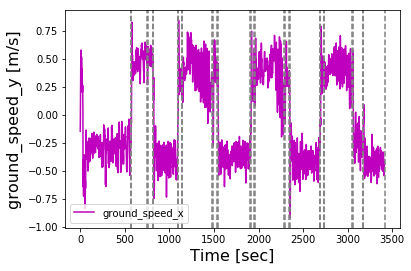

In [8]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ground_speed_y [m/s]', fontsize=16)
ax1.plot(standardized_time, speed_y, label='ground_speed_x', color='m')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

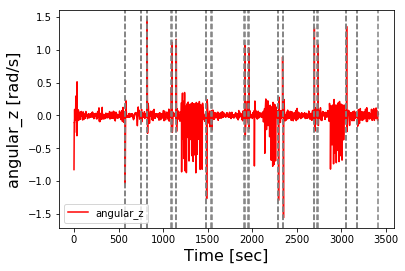

In [9]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('angular_z [rad/s]', fontsize=16)
ax1.plot(standardized_time, angular_z, label='angular_z', color='r')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

### Temperature

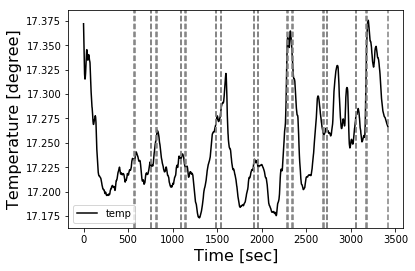

Standard Deviation of the temp is 0.04573139565370398 
Mean of the temp is 17.24548850630607 


In [10]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Temperature [degree]', fontsize=16)
ax1.plot(standardized_time, temp, label='temp', color='k')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(temp)))
print("Mean of the temp is % s " %(statistics.mean(temp))) 

### PH

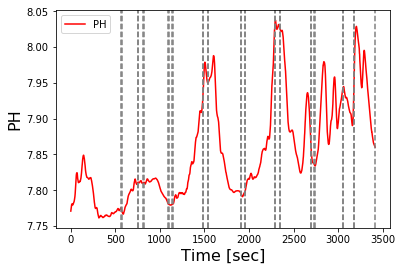

Standard Deviation of the temp is 0.07183191344233027 
Mean of the temp is 7.855028009394911 


In [11]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('PH', fontsize=16)
ax1.plot(standardized_time, PH, label='PH', color='r')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(PH)))
print("Mean of the temp is % s " %(statistics.mean(PH))) 

### Conductivity

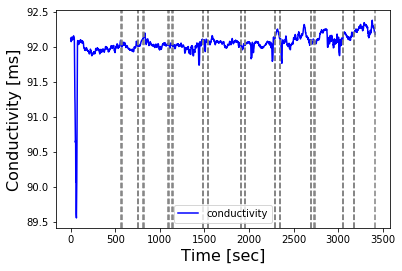

Standard Deviation of the chlorophyll is 0.1849175159181435 
Mean of the chlorophyll is 92.04955741986663 


In [12]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Conductivity [ms]', fontsize=16)
ax1.plot(standardized_time, cond, label='conductivity', color='b')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(cond)))
print("Mean of the chlorophyll is % s " %(statistics.mean(cond)))

### Chlorophyll 

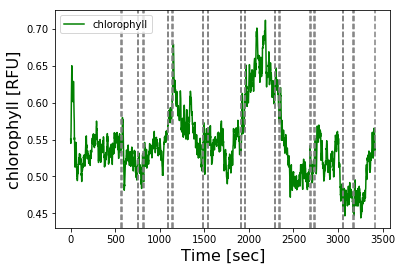

Standard Deviation of the chlorophyll is 0.04837359964992228 
Mean of the chlorophyll is 0.5444990992669589 


In [13]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('chlorophyll [RFU]', fontsize=16)
ax1.plot(standardized_time, chlorophyll, label='chlorophyll', color='g')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(chlorophyll)))
print("Mean of the chlorophyll is % s " %(statistics.mean(chlorophyll))) 

### ODO

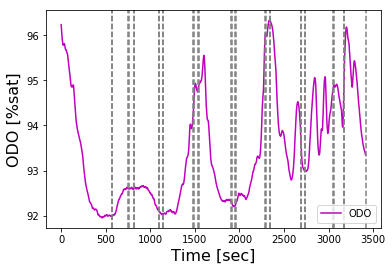

Standard Deviation of the DO is 1.2288663982585049 
Mean of the DO is 93.4318085760187 


In [14]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ODO [%sat]', fontsize=16)
ax1.plot(standardized_time, ODO, label='ODO', color='m')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the DO is % s " %(statistics.stdev(ODO)))
print("Mean of the DO is % s " %(statistics.mean(ODO))) 

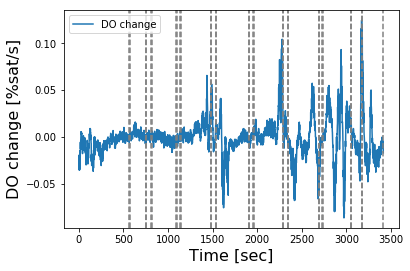

In [15]:
# Figure initialization
fig, ax1 = plt.subplots()

dt_list = []
dy_list = []

for i, data in enumerate(ODO):
    if i == 0:
        continue
    else:
        dt_list.append(standardized_time[i] - standardized_time[i-1])
        dy_list.append(ODO[i] - ODO[i-1])
        
dt_list = np.array(dt_list)
dy_list = np.array(dy_list)

        
ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('DO change [%sat/s]', fontsize=16)
ax1.plot(standardized_time[1:], dy_list/dt_list, label='DO change')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

### Sonar depth

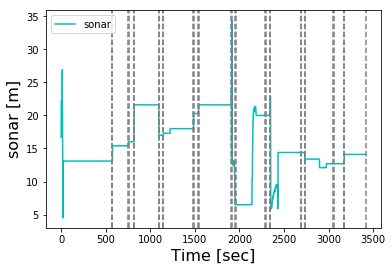

In [16]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('sonar [m]', fontsize=16)
ax1.plot(standardized_time, sonar, label='sonar', color='c')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

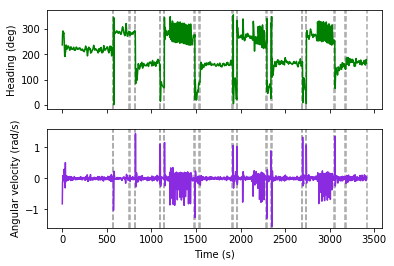

In [23]:
fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')

axis = (ax1, ax2)
for wp in standardized_time2:
    for each in axis:
        each.axvline(x=wp, color='darkgrey', linestyle='--')

ax1.plot(standardized_time, compass_heading, color='green')
ax1.tick_params(axis='y')
ax1.tick_params(labelbottom=False)
#ax1.set_ylim([0, 360])
ax1.set_ylabel('Heading (deg)')


ax2.plot(standardized_time, angular_z, color='blueviolet')
ax2.set_ylim([-1.6, 1.6])
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Angular velocity (rad/s)')

fig.savefig('1006-china-turning-entire.pdf', bbox_inches ='tight')

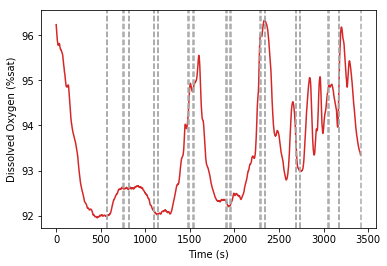

In [18]:
# Figure initialization
fig, ax1 = plt.subplots()
color = 'tab:red'

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Dissolved Oxygen (%sat)')
ax1.plot(standardized_time, ODO, label='ODO', color=color)
ax1.tick_params(axis='y')
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='darkgray', linestyle='--')

"""
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Conductivity (mS/cm)', color=color)
ax2.plot(standardized_time, cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axvline(x=630, color='orange', linestyle='--', LineWidth=3)
plt.axvline(x=780, color='orange', linestyle='--', LineWidth=3)
"""
plt.show()

#fig.savefig('1006-china-turning-entire-sensor.pdf', bbox_inches ='tight')